                                                          Email spam Detection with Machine Learning

Accuracy: 0.9662598707824839
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.75      0.86       191

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393



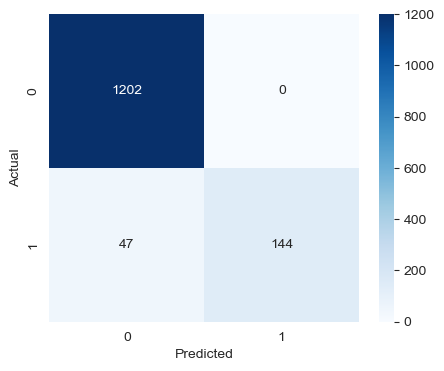

Prediction: SPAM


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

# keep only required columns
df = df[["v1", "v2"]]
df.columns = ["label", "email"]

# map labels
df["label"] = df["label"].map({"ham": 0, "spam": 1})

# features & target
X = df["email"]
y = df["label"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# vectorization
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# prediction
y_pred = model.predict(X_test_vec)

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# test custom email
test_email = ["Congratulations! You have won a free prize. Click now."]
test_vec = vectorizer.transform(test_email)
print("Prediction:", "SPAM" if model.predict(test_vec)[0] == 1 else "NOT SPAM")
